In [21]:
import feather
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


from py2neo import Graph

## EDA

In [3]:
df = feather.read_dataframe('data/credit_transactions.feather')

In [4]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


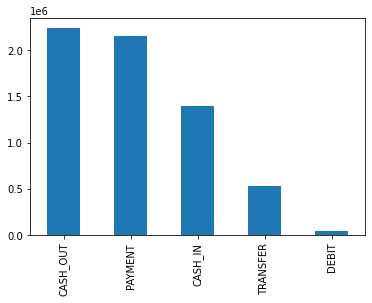

In [9]:
df['type'].value_counts().plot(kind="bar");

In [14]:
df['nameOrig'].nunique()/len(df)

0.9985362947967975

In [15]:
df['nameDest'].nunique()/len(df)

0.4278680795018404

(<AxesSubplot:>,)

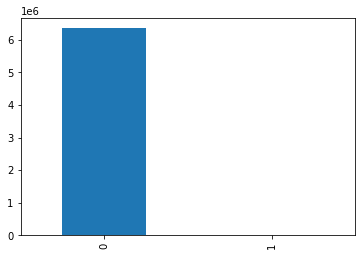

In [27]:
df['isFraud'].value_counts().plot(kind='bar'),

In [28]:
df['isFraud'].value_counts()

0    6354407
1       8213
Name: isFraud, dtype: int64

In [29]:
df['isFlaggedFraud'].value_counts()

0    6362604
1         16
Name: isFlaggedFraud, dtype: int64

## Connecting to SandBox

In [30]:
## Credentials
#  bolt: bolt://3.95.245.105:7687
#  username: neo4j
#  password: hospital-inceptions-integrity

graph = Graph("bolt://3.95.245.105:7687", auth=("neo4j", "hospital-inceptions-integrity"))

![title](images/fraud_Graph.png)

In [31]:
graph.run("""MATCH (n) RETURN n""").to_data_frame()

""
